In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/

 1.jpg				  id4.tar.gz
 2.jpg				  Kartina.cdr
 3.jpg				 'Kate_bot  or personal data science.gslides'
 4.jpg				  korobochka.rar
'ardupilot_3.8.0 (1).zip'	 'last ben 26 01 2017.rar'
 ardupilot_3.8.0.zip		  libraries.rar
'Colab Notebooks'		  neuro.tar.gz
 cropped_target.png		  PImasters.tar
 Dataset102Output_parsed.tar.gz   pistol_A9.tar.gz
 Dataset107_parsed.tar.gz	  pistol_B2.tar.gz
 Debug2.rar			 'Popika Viacheslav CV.pdf'
 Debug.rar			  recup_dir.1.rar
'dlib_gpu (1).tar.gz'		  rez.pdf
 dlib_gpu.tar.gz		 'Robota cascad.rar'
'EfficientDet (1).tar.gz'	  save
 EfficientDet.tar.gz		  shape.dat
 f2fStarter.rar			  skyeton_time
 face_detector.tar.gz		  straight.zip
 face_orig.tar.gz		  tinker.zip
 Face_Recognize.tar.gz		  top.ra
 face_test.tar.gz		  yolo30.zip
 ffhq.pkl			  yolo_data.zip
'Gun1 (1).tar.gz'		  фывфывфв.gsheet
 Gun1.tar.gz


In [ ]:
import cv2
import numpy as np
from PIL import Image
import dlib

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('drive/MyDrive/shape.dat')

def find_eyes(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects = detector(gray, 0)
  
  if len(rects) == 0:
    raise ValueError("No faces detected")
  elif len(rects) > 1:
    raise ValueError("Multiple faces detected")

  shape = predictor(gray, rects[0])
  features = []

  for i in range(0, 5):
    features.append((i, (shape.part(i).x, shape.part(i).y)))

  return (int(features[3][1][0] + features[2][1][0]) // 2, \
    int(features[3][1][1] + features[2][1][1]) // 2), \
    (int(features[1][1][0] + features[0][1][0]) // 2, \
    int(features[1][1][1] + features[0][1][1]) // 2)

def crop_stylegan(img):
  left_eye, right_eye = find_eyes(img)
  d = abs(right_eye[0] - left_eye[0])
  z = 255/d
  ar = img.shape[0]/img.shape[1]
  w = img.shape[1] * z
  img2 = cv2.resize(img, (int(w), int(w*ar)))
  bordersize = 1024
  img3 = cv2.copyMakeBorder(
      img2,
      top=bordersize,
      bottom=bordersize,
      left=bordersize,
      right=bordersize,
      borderType=cv2.BORDER_REPLICATE)

  left_eye2, right_eye2 = find_eyes(img3)

  crop1 = left_eye2[0] - 385 
  crop0 = left_eye2[1] - 490
  return img3[crop0:crop0+1024,crop1:crop1+1024]

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
!nvidia-smi

Wed Sep  8 19:49:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

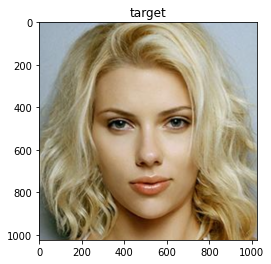

True

In [24]:

from matplotlib import pyplot as plt
import cv2



image_target = cv2.imread('drive/MyDrive/faces/scarlett3.jpeg')
if image_target is None:
    raise ValueError("Source image not found")

cropped_target = crop_stylegan(image_target)



img = cv2.cvtColor(cropped_target, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('target')
plt.show()

cv2.imwrite("drive/MyDrive/cropped_target_scarlett2.png", cropped_target)

#print(find_eyes(cropped_source))
#print(find_eyes(cropped_target))

In [15]:
import sys
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!pip install ninja
sys.path.insert(0, "/content/stylegan2-ada-pytorch")

fatal: destination path 'stylegan2-ada-pytorch' already exists and is not an empty directory.
     |████████████████████████████████| 108 kB 12.4 MB/s 


In [16]:
!python /content/stylegan2-ada-pytorch/projector.py --save-video 0 --num-steps 1000 --outdir=out_source --target=drive/MyDrive/cropped_target.png --network=drive/MyDrive/ffhq.pkl

Loading networks from "drive/MyDrive/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1051: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return forward_call(*input, **kwargs)
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.64 loss 24569.53
step    2/1000: dist 0.59 loss 27642.81
step    3/1000: dist 0.61 loss 27167.64
step    4/1000: dist 0.60 loss 26253.72
step    5/1000: dist 0.59 loss 24958.56
step    6/1000: dist 0.58 loss 23356.14
step    7/1000: dist 0.64 loss 21513.80
step    8/1000: dist 0.61 loss 19486.13
step    9/1000: dist 0.63 loss 17342.29
step   10/1000: dist 0.59 loss 15145.50
step   11/1000: dist 0.

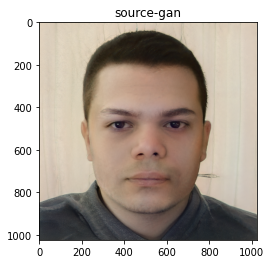

In [17]:
img_gan_source = cv2.imread('/content/out_source/proj.png')
img = cv2.cvtColor(img_gan_source, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('source-gan')
plt.show()

In [25]:
!python /content/stylegan2-ada-pytorch/projector.py --save-video 0 --num-steps 1000 --outdir=out_source_scarlett2 --target=drive/MyDrive/cropped_target_scarlett2.png --network=drive/MyDrive/ffhq.pkl

Loading networks from "drive/MyDrive/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1051: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return forward_call(*input, **kwargs)
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.61 loss 24569.49
step    2/1000: dist 0.64 loss 27642.86
step    3/1000: dist 0.58 loss 27167.61
step    4/1000: dist 0.62 loss 26253.74
step    5/1000: dist 0.57 loss 24958.53
step    6/1000: dist 0.56 loss 23356.12
step    7/1000: dist 0.64 loss 21513.81
step    8/1000: dist 0.56 loss 19486.09
step    9/1000: dist 0.59 loss 17342.24
step   10/1000: dist 0.62 loss 15145.53
step   11/1000: dist 0.

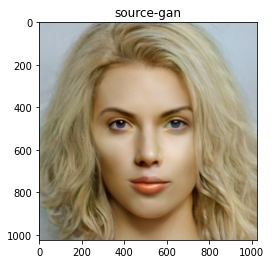

In [26]:
img_gan_source = cv2.imread('/content/out_source_scarlett2/proj.png')
img = cv2.cvtColor(img_gan_source, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('source-gan')
plt.show()

In [35]:
import torch
import dnnlib
import legacy
import PIL.Image
import numpy as np
import imageio
from tqdm.notebook import tqdm

lvec1 = np.load('/content/out_source/projected_w.npz')['w']
vec2 = np.load('/content/out_source_scarlett/projected_w.npz')['w']
vec3 = np.load('/content/out_source_scarlett2/projected_w.npz')['w']

lvec2 = vec3-vec2+lvec1

STEPS = 150
FPS = 30
FREEZE_STEPS = 30

network_pkl = "drive/MyDrive/ffhq.pkl"
device = torch.device('cuda')
with dnnlib.util.open_url(network_pkl) as fp:
    G = legacy.load_network_pkl(fp)['G_ema'].requires_grad_(False).to(device) # type: ignore

diff = lvec2 - lvec1
step = diff / STEPS
current = lvec1.copy()
target_uint8 = np.array([1024,1024,3], dtype=np.uint8)

video = imageio.get_writer('drive/MyDrive/movie.mp4', mode='I', fps=FPS, codec='libx264', bitrate='16M')

for j in tqdm(range(STEPS)):
  z = torch.from_numpy(current).to(device)
  synth_image = G.synthesis(z, noise_mode='const')
  synth_image = (synth_image + 1) * (255/2)
  synth_image = synth_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

  repeat = FREEZE_STEPS if j==0 or j==(STEPS-1) else 1
   
  for i in range(repeat):
    video.append_data(synth_image)
  current = current + step


video.close()

  0%|          | 0/150 [00:00<?, ?it/s]